# Step 1: Toolkits for EDA with Python

## Cargar librerías

In [435]:
import seaborn as sns

In [436]:
import pandas as pd

In [437]:
import numpy as np

In [438]:
import matplotlib.pyplot as plt

In [439]:
import seaborn as sns

In [440]:
from sklearn import preprocessing, model_selection

# Step 2: Importing Data and Reading Dataset

In [441]:
df = pd.read_csv("Data/House_sales.csv", sep=";")

In [442]:
df.shape # Para conocer el número de filas y columnas (f,c)

(2919, 81)

In [443]:
df.head() # Primeras 5 filas del dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [444]:
df.tail() # Últimas 5 filas del dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Step 3: Analyzing the Data

In [445]:
df.info() # muestra el tipo de datos de cada columna y si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [446]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [447]:
# Columnas con valores numéricos
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [448]:
# Resumen estadístico de las columnas numéricas.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Paso 4: Gestión de duplicaciones y valores faltantes 

### 4.1 Manejo de duplicaciones

In [449]:
duplicates = df.duplicated()

In [450]:
duplicates.value_counts()

False    2919
dtype: int64

In [451]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

#### 4.2.1 Identifcar las columnas con datos faltantes

In [452]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [453]:
missing_data

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

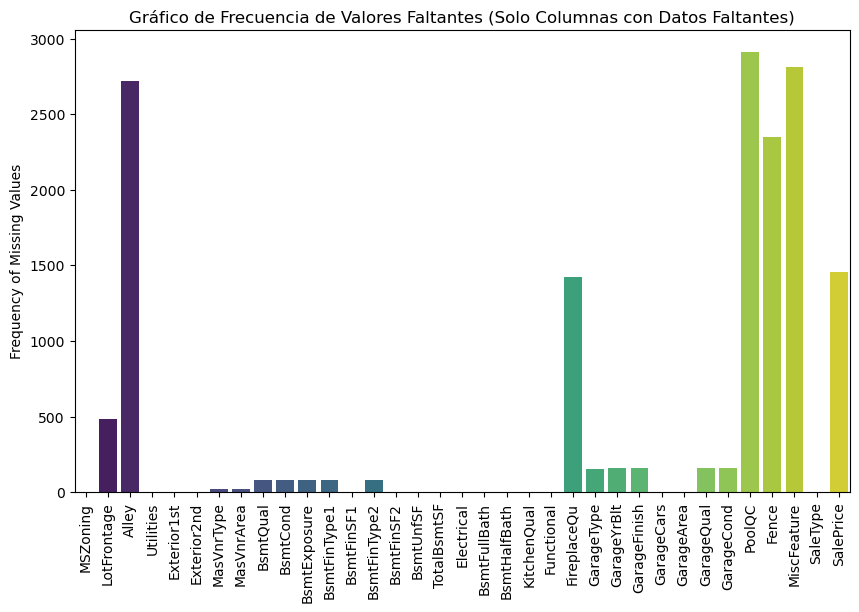

In [454]:
# Calculate the count of missing values for each column
missing_counts = df.isnull().sum()

# Filter to keep only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Create a bar plot for the frequency of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Frequency of Missing Values')
plt.title('Gráfico de Frecuencia de Valores Faltantes (Solo Columnas con Datos Faltantes)')
plt.show()

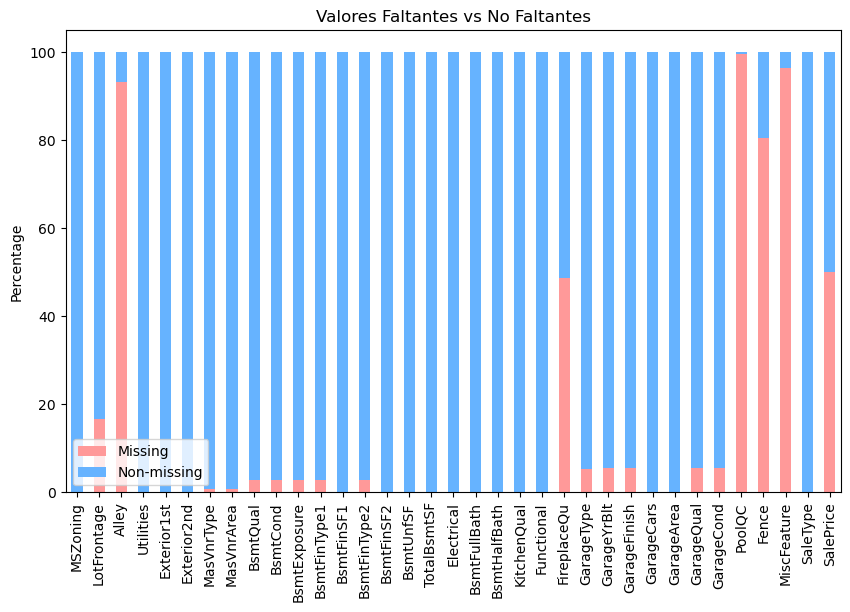

In [455]:
# Calculate percentage of missing and non-missing values
missing_percentage = df.isnull().mean() * 100
non_missing_percentage = 100 - missing_percentage

# Filter columns with missing values
missing_columns = missing_percentage[missing_percentage > 0].index

# Create a DataFrame for the plot
missing_data = pd.DataFrame({
    'Missing': missing_percentage[missing_columns],
    'Non-missing': non_missing_percentage[missing_columns]
}, index=missing_columns)

# Plot the stacked bar plot for columns with missing values
missing_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Valores Faltantes vs No Faltantes')
plt.show()

In [456]:
df["MSZoning"] = df['MSZoning'].mode()[0]

In [457]:
df["LotFrontage"] = df['LotFrontage'].median()

In [458]:
df["Utilities"] = df['Utilities'].mode()[0]

In [459]:
df["Exterior1st"] = df["Exterior1st"].mode()[0]

In [460]:
df["Exterior2nd"] = df["Exterior2nd"].mode()[0]

In [461]:
df["MasVnrType"] = df["MasVnrType"].mode()[0]

In [462]:
df["MasVnrArea"] = df["MasVnrArea"].median()

In [463]:
df["BsmtQual"] = df["BsmtQual"].mode()[0]

In [464]:
df["BsmtCond"] = df["BsmtCond"].mode()[0]

In [465]:
df["BsmtExposure"] = df["BsmtExposure"].mode()[0]

In [466]:
df["BsmtFinType1"] = df["BsmtFinType1"].mode()[0]

In [467]:
df["BsmtFinSF1"] = df["BsmtFinSF1"].median()

In [468]:
df["BsmtFinType2"] = df["BsmtFinType2"].mode()[0]

In [469]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].median()

In [470]:
df["BsmtUnfSF"] = df["BsmtUnfSF"].median()

In [471]:
df["TotalBsmtSF"] = df["TotalBsmtSF"].median()

In [472]:
df["Electrical"] = df["Electrical"].mode()[0]

In [473]:
df["BsmtFullBath"] = df["BsmtFullBath"].mode()[0]

In [474]:
df["BsmtHalfBath"] = df["BsmtHalfBath"].mode()[0]

In [475]:
df["KitchenQual"] = df["KitchenQual"].mode()[0]

In [476]:
df["Functional"] = df["Functional"].mode()[0]

In [477]:
df["GarageType"] = df["GarageType"].mode()[0]

In [478]:
df["GarageYrBlt"] = df["GarageYrBlt"].mode()[0]

In [479]:
df["GarageFinish"] = df["GarageFinish"].mode()[0]

In [480]:
df["GarageCars"] = df["GarageCars"].mode()[0]

In [481]:
df["GarageArea"] = df["GarageArea"].median()

In [482]:
df["GarageQual"] = df["GarageQual"].mode()[0]

In [483]:
df["GarageCond"] = df["GarageCond"].mode()[0]

In [484]:
df["SaleType"] = df["SaleType"].mode()[0]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\guill\AppData\Local\Temp\ipykernel_2948\4009015088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

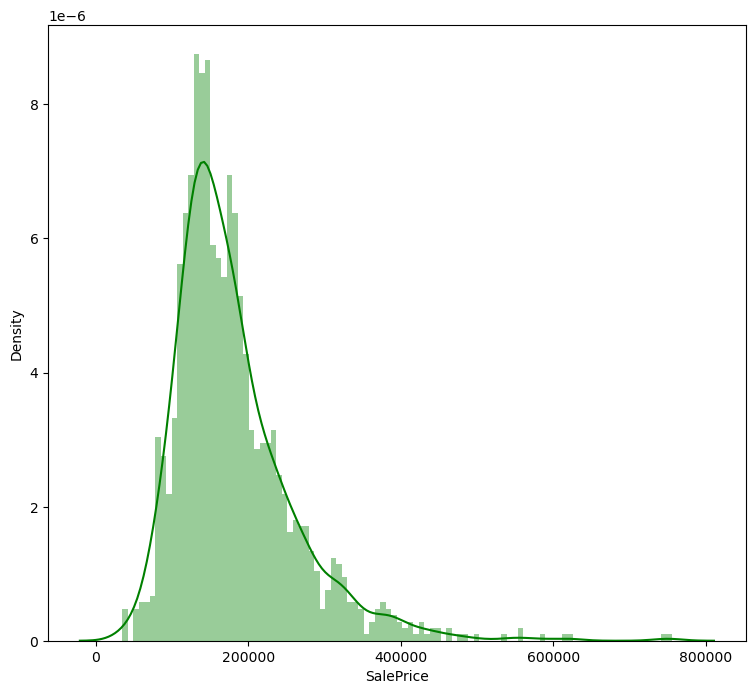

In [485]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

# Paso 5: Reducción de datos

In [486]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,68.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,68.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,68.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,68.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [487]:
data = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [488]:
data = data[['MSSubClass', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual', 'Foundation' , 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'Neighborhood', 'SalePrice']]

In [489]:
data.head()

,MSSubClass,LotArea,LotShape,HouseStyle,OverallQual,Foundation,BedroomAbvGr,KitchenAbvGr,OverallCond,Neighborhood,SalePrice
0,60,8450,Reg,2Story,7,PConc,3,1,5,CollgCr,208500.0
1,20,9600,Reg,1Story,6,CBlock,3,1,8,Veenker,181500.0
2,60,11250,IR1,2Story,7,PConc,3,1,5,CollgCr,223500.0
3,70,9550,IR1,2Story,7,BrkTil,3,1,5,Crawfor,140000.0
4,60,14260,IR1,2Story,8,PConc,4,1,5,NoRidge,250000.0


# Paso 5: Limpieza disputa de datos

### 5.1 Cambiar el nombre de los valores

In [490]:
replacement_dict_ms_sub_class = {
    20: 'PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS', 
    30: '1 PISO 1945 Y MÁS ANTIGUOS', 
    40: '1 PISO CON ÁTICO TERMINADO TODAS LAS EDADES', 
    45: '1-1/2 PISO - SIN TERMINAR TODAS LAS EDADES',
    50: '1-1/2 PISOS TERMINADA TODAS LAS EDADES',
    60: '2 PISOS 1946 Y MÁS RECIENTES',
    70: '2 PISOS 1945 Y MÁS ANTIGUOS',
    75: '2-1/2 PISOS TODAS LAS EDADES',
    80: 'DIVIDIDO O MULTINIVEL',
    85: 'VESTÍBULO DIVIDIDO',
    90: 'DÚPLEX - TODOS LOS ESTILOS Y EDADES',
    120: 'PUD DE 1 PISO (Desarrollo de unidades planificadas) - 1946 y posteriores',
    150: 'PUD DE 1-1/2 PISOS - TODAS LAS EDADES',
    160: 'PUD DE 2 PISOS - 1946 Y POSTERIORES',
    180: 'PUD - MULTINIVEL - INCLUYE NIVEL DIVIDIDO/VESTÍBULO',
    190: '2 REFORMAS FAMILIARES - TODOS LOS ESTILOS Y EDADES'
}

In [491]:
data['MSSubClass'] = data['MSSubClass'].replace(replacement_dict_ms_sub_class)
data['MSSubClass']

0                      2 PISOS 1946 Y MÁS RECIENTES
1       PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
2                      2 PISOS 1946 Y MÁS RECIENTES
3                       2 PISOS 1945 Y MÁS ANTIGUOS
4                      2 PISOS 1946 Y MÁS RECIENTES
                           ...                     
2914            PUD DE 2 PISOS - 1946 Y POSTERIORES
2915            PUD DE 2 PISOS - 1946 Y POSTERIORES
2916    PISO 1946 Y MÁS RECIENTES TODOS LOS ESTILOS
2917                             VESTÍBULO DIVIDIDO
2918                   2 PISOS 1946 Y MÁS RECIENTES
Name: MSSubClass, Length: 2919, dtype: object

In [492]:
replacement_dict_overall_qual = {
    1: 'Muy pobre', 
    2: 'Pobre', 
    3: 'Regular', 
    4: 'Por debajo del promedio',
    5: 'Promedio',
    6: 'Por encima del promedio',
    7: 'Bueno',
    8: 'Muy bueno',
    9: 'Excelente',
    10: 'Excepcional'
}

In [493]:
data['OverallQual'] = data['OverallQual'].replace(replacement_dict_overall_qual)
data['OverallQual'].value_counts()

Promedio                   825
Por encima del promedio    731
Bueno                      600
Muy bueno                  342
Por debajo del promedio    226
Excelente                  107
Regular                     40
Excepcional                 31
Pobre                       13
Muy pobre                    4
Name: OverallQual, dtype: int64

In [494]:
replacement_dict_overall_cond = {
    1: 'Muy pobre', 
    2: 'Pobre', 
    3: 'Regular', 
    4: 'Por debajo del promedio',
    5: 'Promedio',
    6: 'Por encima del promedio',
    7: 'Bueno',
    8: 'Muy bueno',
    9: 'Excelente',
    10: 'Excepcional'
}

In [495]:
data['OverallCond'] = data['OverallCond'].replace(replacement_dict_overall_cond)
data['OverallCond'].value_counts()

Promedio                   1645
Por encima del promedio     531
Bueno                       390
Muy bueno                   144
Por debajo del promedio     101
Regular                      50
Excelente                    41
Pobre                        10
Muy pobre                     7
Name: OverallCond, dtype: int64

In [496]:
replacement_dict_lot_shape = {
    'Reg': 'Forma regular', 
    'IR1': 'Forma ligeramente irregular', 
    'IR2': 'Forma moderadamente irregular', 
    'IR3': 'Forma irregular'
}

In [497]:
data['LotShape'] = data['LotShape'].replace(replacement_dict_lot_shape)
data['LotShape'].value_counts()

Forma regular                    1859
Forma ligeramente irregular       968
Forma moderadamente irregular      76
Forma irregular                    16
Name: LotShape, dtype: int64

In [498]:
replacement_dict_house_style = {
    '1Story': 'Un piso', 
    '1.5Fin': 'Uno y medio pisos: segundo nivel terminado', 
    '1.5Unf': 'Uno y medio pisos: segundo nivel no terminado', 
    '2Story': 'Dos pisos', 
    '2.5Fin': 'Dos y medio pisos: segundo nivel terminado',
    '2.5Unf': 'Dos y medio pisos: segundo nivel no terminado', 
    'SFoyer': 'Vestíbulo dividido', 
    'SLvl': 'Nivel dividido'
}

In [499]:
data['HouseStyle'] = data['HouseStyle'].replace(replacement_dict_house_style)
data['HouseStyle'].value_counts()

Un piso                                          1471
Dos pisos                                         872
Uno y medio pisos: segundo nivel terminado        314
Nivel dividido                                    128
Vestíbulo dividido                                 83
Dos y medio pisos: segundo nivel no terminado      24
Uno y medio pisos: segundo nivel no terminado      19
Dos y medio pisos: segundo nivel terminado          8
Name: HouseStyle, dtype: int64

In [500]:
replacement_dict_foundation = {
    'BrkTil': 'Ladrillo y azulejo', 
    'CBlock': 'Bloque de cemento', 
    'PConc': 'Concreto vertido', 
    'Slab': 'Losa', 
    'Stone': 'Piedra',
    'Wood': 'Madera'
}

In [501]:
data['Foundation'] = data['Foundation'].replace(replacement_dict_foundation)
data['Foundation'].value_counts()

Concreto vertido      1308
Bloque de cemento     1235
Ladrillo y azulejo     311
Losa                    49
Piedra                  11
Madera                   5
Name: Foundation, dtype: int64

In [502]:
data.dtypes

MSSubClass       object
LotArea           int64
LotShape         object
HouseStyle       object
OverallQual      object
Foundation       object
BedroomAbvGr      int64
KitchenAbvGr      int64
OverallCond      object
Neighborhood     object
SalePrice       float64
dtype: object

### 5.2 Convertir a minusculas

In [503]:
data['MSSubClass'] = data['MSSubClass'].astype(str).str.lower().str.strip()

In [504]:
data['OverallQual'] = data['OverallQual'].astype(str).str.lower().str.strip()

In [505]:
data['OverallCond'] = data['OverallCond'].astype(str).str.lower().str.strip()

In [506]:
data['LotShape'] = data['LotShape'].astype(str).str.lower().str.strip()

In [507]:
data['HouseStyle'] = data['HouseStyle'].astype(str).str.lower().str.strip()

In [508]:
data['Foundation'] = data['Foundation'].astype(str).str.lower().str.strip()

### 5.3 Convertir a categoria

In [509]:
data['MSSubClass'] = data['MSSubClass'].astype('category')

In [510]:
data['OverallQual'] = data['OverallQual'].astype('category')

In [511]:
data['OverallCond'] = data['OverallCond'].astype('category')

In [512]:
data['LotShape'] = data['LotShape'].astype('category')

In [513]:
data['HouseStyle'] = data['HouseStyle'].astype('category')

In [514]:
data['Foundation'] = data['Foundation'].astype('category')

In [515]:
data['Neighborhood'] = data['Neighborhood'].astype('category')

### 5.4 Cambiar los nombres de columnas

In [517]:
data.rename(columns={'MSSubClass': 'Tipo_Vivienda', 
                     'LotArea': 'Area_Lote',
                     'LotShape': 'Forma_Lote',
                     'HouseStyle': 'Estilo_Casa',
                     'OverallQual': 'Material_Acabados',
                     'Foundation': 'Tipo_Cimentación',
                     'BedroomAbvGr': 'No. Habitaciones',
                     'KitchenAbvGr': 'No. Cocinas',
                     'OverallCond': 'Cond._Generales',
                     'Neighborhood': 'Vecinadario',
                     'SalePrice': 'Precio_Venta',
                    }, inplace=True)

In [518]:
data.head()

,Tipo_Vivienda,Area_Lote,Forma_Lote,Estilo_Casa,Material_Acabados,Tipo_Cimentación,No. Habitaciones,No. Cocinas,Cond._Generales,Vecinadario,Precio_Venta
0,2 pisos 1946 y más recientes,8450,forma regular,dos pisos,bueno,concreto vertido,3,1,promedio,CollgCr,208500.0
1,piso 1946 y más recientes todos los estilos,9600,forma regular,un piso,por encima del promedio,bloque de cemento,3,1,muy bueno,Veenker,181500.0
2,2 pisos 1946 y más recientes,11250,forma ligeramente irregular,dos pisos,bueno,concreto vertido,3,1,promedio,CollgCr,223500.0
3,2 pisos 1945 y más antiguos,9550,forma ligeramente irregular,dos pisos,bueno,ladrillo y azulejo,3,1,promedio,Crawfor,140000.0
4,2 pisos 1946 y más recientes,14260,forma ligeramente irregular,dos pisos,muy bueno,concreto vertido,4,1,promedio,NoRidge,250000.0


# Step 9: EDA — Exploratory Data Analysis

# Step 10: Statistics Summary

# Step 11: EDA — Univariate Analysis

# Step 12: Data Transformation

# Step 13: EDA — Bivariate Analysis

# Step 14: EDA — Multivariate Analysis

# Step 15: Observing Data, Insights, and Storytelling